In [2]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

<Figure size 1500x600 with 0 Axes>

In [3]:
df_food_delivery = pd.read_csv("dados/dataset.csv", encoding = 'utf-8')
df_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [4]:
# Verificando valores nulos
df_food_delivery.isnull().sum()

id_transacao       0
horario_pedido     0
localidade         0
nome_item          0
quantidade_item    0
latitude           0
longitude          0
dtype: int64

In [5]:
# Tipos de dados
df_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [6]:
#transformando a coluna localidade em object
df_food_delivery['localidade'] = df_food_delivery['localidade'].astype('object')

In [7]:
df_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade          object
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [8]:
df_food_delivery.count()

id_transacao       260645
horario_pedido     260645
localidade         260645
nome_item          260645
quantidade_item    260645
latitude           260645
longitude          260645
dtype: int64

In [10]:
# Criando uma tabela Pivot para mudar a perspectiva do dado
df_pivot = df_food_delivery.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [11]:
# Preenchendo os valores nulos criados no passo anterior e fazendo um merge para incluir a louna localidade e horario
df_pivot.head()
df_pivot = df_pivot.fillna(0).reset_index()
df_pivot = df_pivot.merge(df_food_delivery[['id_transacao', 'localidade', 'horario_pedido']])

In [47]:
df_pivot.count()

id_transacao      100000
bebida            100000
pizza             100000
salada            100000
sobremesa         100000
localidade        100000
horario_pedido    100000
fim_de_semana     100000
dtype: int64

In [14]:
df_pivot = df_pivot.drop_duplicates()

In [15]:
df_pivot.count()

id_transacao      100000
bebida            100000
pizza             100000
salada            100000
sobremesa         100000
localidade        100000
horario_pedido    100000
dtype: int64

In [16]:
# Criando a coluna fim de semana
df_pivot['horario_pedido'] = pd.to_datetime(df_pivot['horario_pedido'])

# Função para verificar se a data é um fim de semana
def e_fim_de_semana(data):
    return data.weekday() in [5, 6]  # 5 representa sábado e 6 representa domingo

# Criar a nova coluna 'fim_de_semana'
df_pivot['fim_de_semana'] = df_pivot['horario_pedido'].apply(e_fim_de_semana)

In [18]:
df_pivot.count()

id_transacao      100000
bebida            100000
pizza             100000
salada            100000
sobremesa         100000
localidade        100000
horario_pedido    100000
fim_de_semana     100000
dtype: int64

In [19]:
# Removendo as colunas que nao serao usadas no modelo
df_limpo = df_pivot.iloc[:,range(1,8)]

In [21]:
df_final =  df_limpo.drop('horario_pedido', axis=1)

In [22]:
df_final['fds'] = df_final['fim_de_semana'].astype(int)

In [23]:
df_final = df_final.drop('fim_de_semana', axis=1)

In [24]:
df_final.head()


,bebida,pizza,salada,sobremesa,localidade,fds
0,0.0,1.0,0.0,1.0,9,0
2,0.0,2.0,0.0,2.0,6,1
4,4.0,4.0,1.0,5.0,9,0
8,0.0,1.0,0.0,1.0,6,1
10,3.0,3.0,0.0,3.0,2,1


In [48]:
df_final.count()

bebida        100000
pizza         100000
salada        100000
sobremesa     100000
localidade    100000
fds           100000
dtype: int64

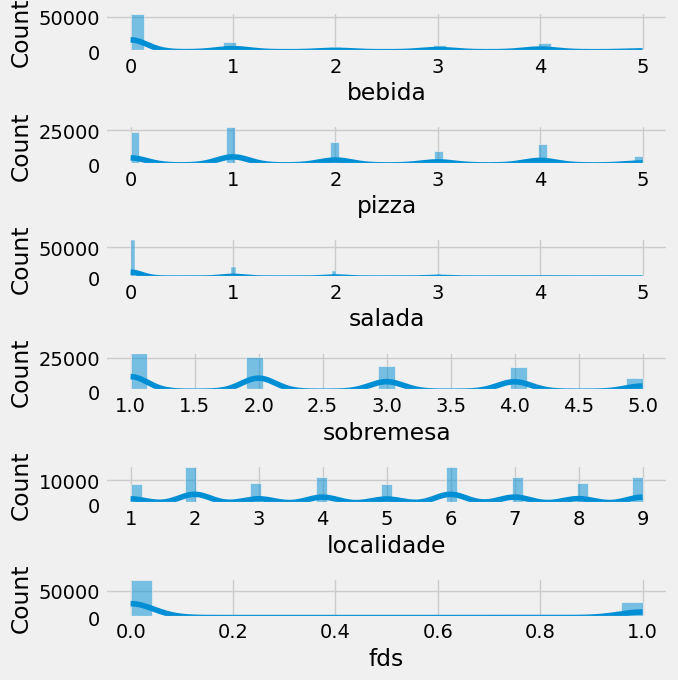

In [49]:
plt.figure(figsize=(7,7))
for i in range(len(df_final.columns)):
    plt.subplot(6, 1, i + 1)
    sns.histplot(df_final[df_final.columns[i]], kde=True)
plt.tight_layout();

<Axes: >

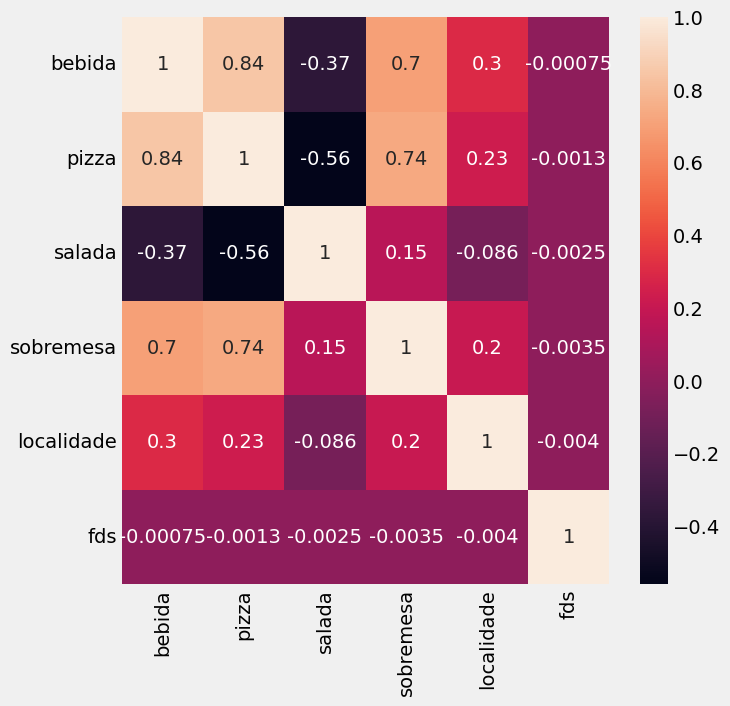

In [27]:
correlacoes = df_final.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(correlacoes, annot=True)

In [50]:
# Padronizacao 
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final)
df_final_scaled

array([[-0.761476  , -0.54000384, -0.65472417, -1.17801721,  1.56998696,
        -0.63269682],
       [-0.761476  ,  0.08948865, -0.65472417, -0.42731003,  0.39111156,
         1.58053584],
       [ 1.69571066,  1.34847364,  0.26564662,  1.8248115 ,  1.56998696,
        -0.63269682],
       ...,
       [-0.14717934, -0.54000384, -0.65472417, -1.17801721, -1.1807223 ,
         1.58053584],
       [-0.761476  ,  0.08948865, -0.65472417, -0.42731003, -0.78776384,
        -0.63269682],
       [-0.761476  , -0.54000384, -0.65472417, -1.17801721, -1.1807223 ,
        -0.63269682]])

In [51]:
wcss = []
range_values = range(1, 10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_final_scaled)
    wcss.append(kmeans.inertia_);


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\

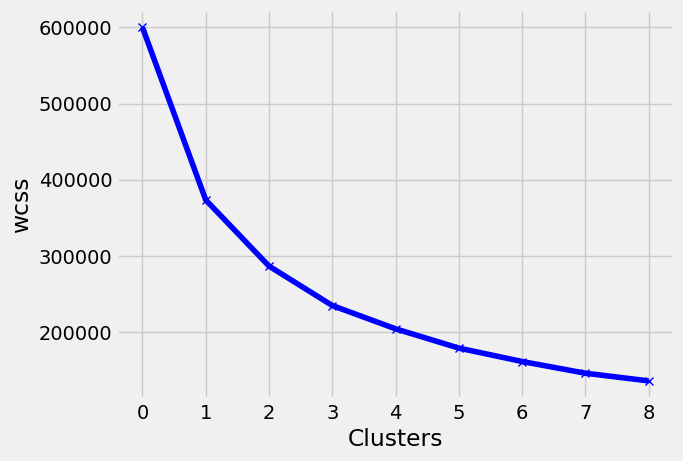

In [52]:
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('wcss');

In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_final_scaled)
labels = kmeans.labels_

c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [100]:
labels, len(labels)

(array([0, 3, 1, ..., 3, 0, 0]), 100000)

In [101]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([34713, 30522, 17247, 17518], dtype=int64))

In [102]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns=df_final.columns)
cluster_centers

,bebida,pizza,salada,sobremesa,localidade,fds
0,-0.528414,-0.408694,-0.400696,-0.814223,-0.187883,-0.632697
1,1.307332,1.303162,-0.514265,1.134634,0.419320,-0.023300
2,-0.698433,-0.996931,1.839514,0.311514,-0.171429,-0.290709
3,-0.543081,-0.479168,-0.121037,-0.670161,-0.189510,1.580536


In [103]:
type(cluster_centers)

pandas.core.frame.DataFrame

In [104]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns=df_final.columns)
cluster_centers

,bebida,pizza,salada,sobremesa,localidade,fds
0,0.379397,1.208596,0.276006,1.484602,4.526575,1.337819e-14
1,3.367768,3.928019,0.152611,4.080630,6.071784,2.753424e-01
2,0.102627,0.274135,2.710037,2.984171,4.568447,1.545196e-01
3,0.355520,1.096643,0.579861,1.676504,4.522434,1.000000e+00


In [ ]:
# termina o teste 1

In [171]:
df_final2 = pd.DataFrame(data=df_final, columns=df_final.columns)
df_final2 = df_final2.drop(columns=['localidade', 'fds'], axis=1)
df_final2.reset_index() 
df_final2

,bebida,pizza,salada,sobremesa
0,0.0,1.0,0.0,1.0
2,0.0,2.0,0.0,2.0
4,4.0,4.0,1.0,5.0
8,0.0,1.0,0.0,1.0
10,3.0,3.0,0.0,3.0
...,...,...,...,...
260633,4.0,4.0,0.0,4.0
260636,0.0,1.0,0.0,1.0
260638,1.0,1.0,0.0,1.0
260641,0.0,2.0,0.0,2.0


In [172]:
df_final2.describe()

,bebida,pizza,salada,sobremesa
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,0.711370,2.569210
std,1.627886,1.588589,1.086524,1.332084
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000
75%,3.000000,3.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [173]:
scaler2 = StandardScaler()
df_final_scaled2 = scaler2.fit_transform(df_final2)
df_final_scaled2

array([[-0.761476  , -0.54000384, -0.65472417, -1.17801721],
       [-0.761476  ,  0.08948865, -0.65472417, -0.42731003],
       [ 1.69571066,  1.34847364,  0.26564662,  1.8248115 ],
       ...,
       [-0.14717934, -0.54000384, -0.65472417, -1.17801721],
       [-0.761476  ,  0.08948865, -0.65472417, -0.42731003],
       [-0.761476  , -0.54000384, -0.65472417, -1.17801721]])

In [174]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_final_scaled2)
labels2 = kmeans2.labels_

c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [175]:
labels2, len(labels2)

(array([0, 0, 2, ..., 0, 0, 0]), 100000)

In [179]:
cluster_centers2 = pd.DataFrame(data= kmeans2.cluster_centers_, columns=df_final2.columns)
cluster_centers2

,bebida,pizza,salada,sobremesa
0,-0.524966,-0.408408,-0.398719,-0.812269
1,-0.694417,-0.987752,1.739243,0.240673
2,1.297411,1.306317,-0.518742,1.134746


In [180]:
cluster_centers3 = scaler2.inverse_transform(cluster_centers2)
cluster_centers3 = pd.DataFrame(data=cluster_centers3, columns=df_final2.columns )
cluster_centers3



,bebida,pizza,salada,sobremesa
0,0.385010,1.209050,0.278155,1.487205
1,0.109164,0.288715,2.601090,2.889805
2,3.351617,3.933031,0.147748,4.080779


In [181]:
df_final2['cluster'] = labels2


In [182]:
df_final2.head()

,bebida,pizza,salada,sobremesa,cluster
0,0.0,1.0,0.0,1.0,0
2,0.0,2.0,0.0,2.0,0
4,4.0,4.0,1.0,5.0,2
8,0.0,1.0,0.0,1.0,0
10,3.0,3.0,0.0,3.0,2


In [183]:
box = df_final2

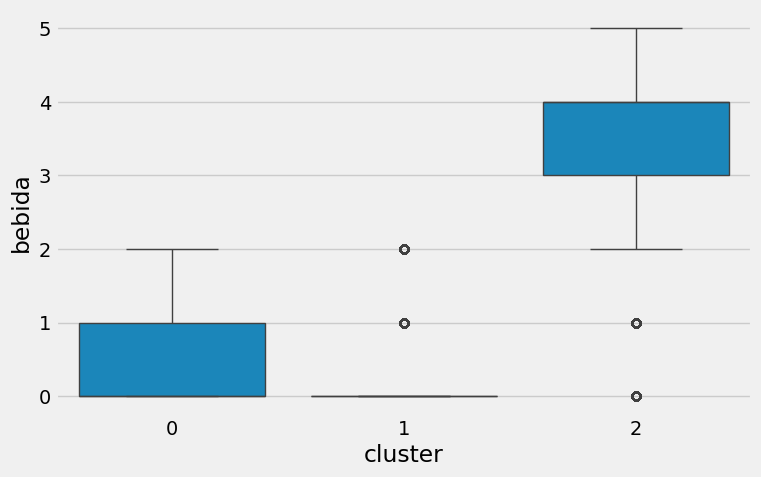

In [186]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='bebida', 
            data=box);

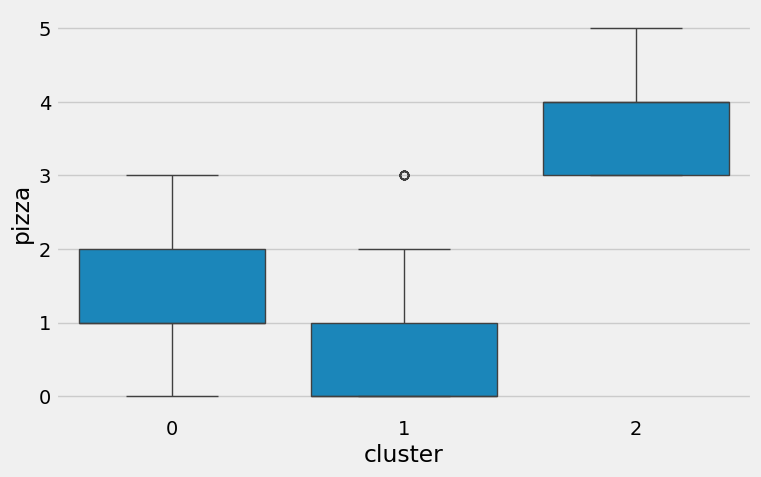

In [188]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='pizza', 
            data=box);

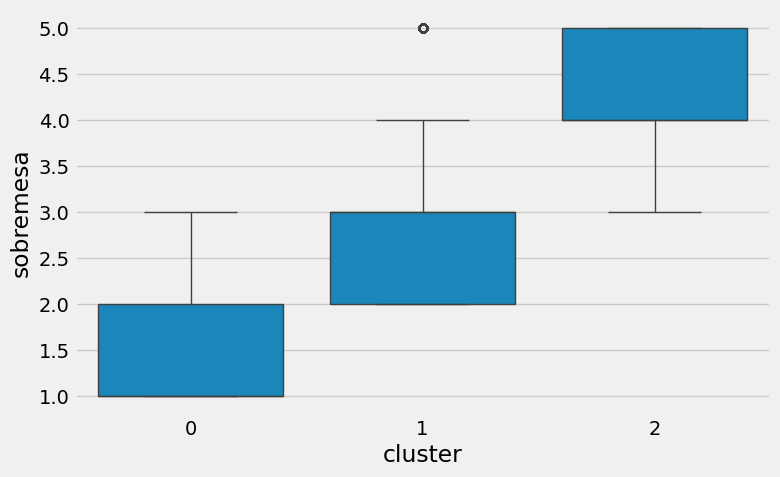

In [189]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='sobremesa', 
            data=box);

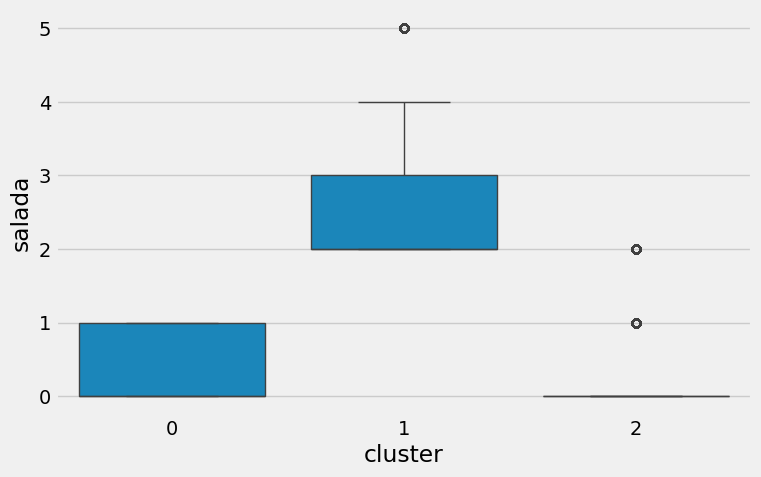

In [191]:
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='salada', 
            data=box);

In [213]:
arquivo = df_final2
arquivo

,bebida,pizza,salada,sobremesa,cluster
0,0.0,1.0,0.0,1.0,0
2,0.0,2.0,0.0,2.0,0
4,4.0,4.0,1.0,5.0,2
8,0.0,1.0,0.0,1.0,0
10,3.0,3.0,0.0,3.0,2
...,...,...,...,...,...
260633,4.0,4.0,0.0,4.0,2
260636,0.0,1.0,0.0,1.0,0
260638,1.0,1.0,0.0,1.0,0
260641,0.0,2.0,0.0,2.0,0


In [217]:
np.unique(labels2, return_counts=True)

(array([0, 1, 2]), array([48926, 20373, 30701], dtype=int64))

In [ ]:
arquivo.to_csv('Clusterização.csv')

ModuleNotFoundError: No module named 'openpyxl'